# Equivariance & convolutional neural networks

Last lecture we asked whether we can prevent the model from doing something if we know it shouldn't. This lecture we will try to explore the tool of equivariance to do the same.

* Together with robustness and invariance, we can use equivariance to get deep insides into many popular network architectures, e.g., Convolutional Networks and Graph Networks (including transformers).

## What is equivariance?

````{prf:definition} Equivariance
:label: equivariance_def

Let $G$ be a group and 

$$f:X \to Y$$

a mapping between vector spaces, e.g., a neural network.

Further let $\rho_X$ and $\rho_Y$ be representations of $G$ on $X$ and $Y$.

We call $f$ equivariant (w.r.t. $\rho_X$ and $\rho_Y$) if $f$ commutes with the group actions, i.e.,

$$f \circ \rho_X(g) = \rho_Y(g) \circ f \ \forall g \in G.$$
````

* I.e., the output changes under the tranformations given by the representations in the same way as the input.
* E.g., if $G$ is the group of rotations, the output rotates if the input does.

````{prf:lemma} Connecting Invariance & Equivariance
:label: invariance_equivariance_lemma

Let $G$ be a group and $f:X \to \mathbb{R}$ a mapping.
Further let $\rho$ be an orthogonal representations of $G$ on $X$.

Then the gradient field $F=\nabla f:X\to X$ is equivariant.
````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}
We have $f(\rho(g)x) = f(x)$ and therefore also $F(x) = \rho(g)^TF(\rho(g)x)$.
Since this implies ${\rho(g)^T}^{'-1} F(x) = F(\rho(g)x)$ we are done.

$\square$
```

## How to get equivariance?

````{prf:lemma} Group averaging
:label: group_averaging_lemma

Let $G$ be a group and $f:X \to Y$ a mapping between vector spaces.
Further let $\rho_X$ and $\rho_Y$ be representations of $G$ on $X$ and $Y$.

Then the mapping

$$x \mapsto \frac{1}{|G|} \sum_{g\in G} \rho_Y(g^{-1})f(\rho_X(g)x)$$

is called group averaging and is equivariant.

````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}
We calculate:

$$
\begin{aligned}
 & \frac{1}{|G|} \sum_{g\in G} \rho_Y(g^{-1})f(\rho_X(g)\rho_X(h)x) \\
=& \frac{1}{|G|} \sum_{g\in G} \rho_Y(g^{-1})f(\rho_X(gh)x) \\
=& \frac{1}{|G|} \sum_{a\in G} \rho_Y(ha^{-1})f(\rho_X(a)x) \\
=& \rho_Y(h) \frac{1}{|G|} \sum_{a\in G} \rho_Y(a^{-1})f(\rho_X(a)x)
\end{aligned}
$$

$\square$
```

We will now investigate a more involved but often also more powerful approach to produce an equivariant linear mapping $\mathcal{K}:X\to Y$. We can then use this approach in a neural network layer $x\mapsto \phi(\mathcal{K}x + b)$, that are equivariant -- assuming the bias $b$ and the activation function $\phi$ are such that they do not break the equivariance.

````{prf:definition} $G$-homogeneous
:label: homogeneous_def

Let $G$ be a group with a representation $\rho$ on a topological space $X$. We call $X$ $G$-homogeneous if $G$ can act transitively on it.
I.e., for any two $x, y\in X$ $\exists g\in G$ such that $\rho(g)x = y.$

````

````{prf:theorem} $G$-convolution is all you need ([Source](https://arxiv.org/pdf/1909.12057.pdf), [Source](https://arxiv.org/pdf/1802.03690.pdf))
:label: group_conv_theorem
Let

$$\mathcal{K}:L_2(X) \ni f \mapsto \int_X \tilde k(x, y)f(x) dx \in L_2(Y)$$

be an integral operator between signals on $G$-homogeneous spaces $X$ and $Y$. Let also $e\in Y$ be some "origin element" and $\rho_Y(g_y)$ an orthonormal representation of $g_y\in G$ such that $\forall y\in Y$ we have $y=\rho_Y(g_y)e$.

Then $\mathcal{K}$ is $G$-equivariant if(f)

$$[\mathcal{K}f](y) = \int_X k(\rho_X(g_y^{-1})x) f(x) dx =: (k \ *_G f)(y)$$

where $k:X\to \mathbb{R}$ the **kernel** and $\rho_X$ a representation on $X$.

This is kind of map is called a **group convolution**.
````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}
We will only show the "if" not the "iff" as that direction is more involved and typically uses different versions of Schur’s lemma. I.e., we show that $(k\ *_G f)(y)$ is $G$-equivariant.

$$
\begin{aligned}
 & \int_X k\left(\rho_X(g_{y})^{-1}x\right) f(\rho_X(g)x) dx \\
=& \int_X k\left(\rho_X(g_{y})^{-1} \rho_X(g)x\right) f(\rho_X(g)\rho_X(g^{-1})x) |\det \rho_X(g^{-1})| dx \\
=&  \int_X k\left(\rho_X([gg_{y}]^{-1}) x\right) f(x) dx\\
\end{aligned}
$$

$\square$
```

```{note}
For the algebra lovers: If we consider the subgroup $H$ given by $Y=G/H$ such that $H=\mbox{Stabilizer}_G(e)$. Then the whole subgroup leaves $e$ unchanged and we have

$$k(x) = \frac{1}{|\det \rho_X(h)|} k(\rho_X(h^{-1})x) \ \forall h\in H.$$
```

## Shift equivariance

Assume that you want a network that works on an image processing task -- e.g., denoise -- to also work on images where the content is shifted.

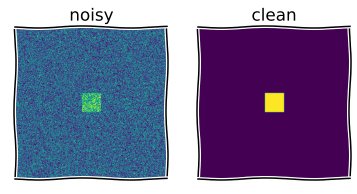

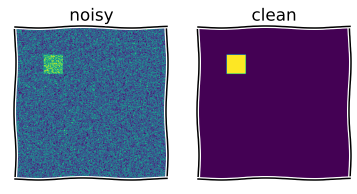

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
plt.xkcd()


def plot(center_parameter=2):
    f = center_parameter

    img = np.zeros((512, 512))
    img[512//f-32 : 512//f+32, 512//f-32 : 512//f+32] = 1.

    img_noisy = np.clip(img + np.random.randn(*img.shape), 0, 1)

    plt.subplot(1, 2, 1)
    plt.title("noisy")
    plt.imshow(img_noisy)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.title("clean")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    plt.show()


plot(center_parameter=2)
plot(center_parameter=4)

This means we want our neural network to be shift equivariant. If we define a shift via the mapping

$$\rho(y)f(x) = f(x - y)$$

we get

$$(k \ *_G f)(y) = \int_X k(y - x) f(x) dx =: (k * f)(y).$$

This is the most popular group convolution which generally simply called convolution is denoted by "$*$" without a subscript.

So if we want to create a shift equivariant neural networks, it makes sense to use convolutions. This leads us to Convolutional Neural Networks (CNNS), usually used on data with spacial structure (i.e., shifts make sense), most prominently images. CNNs are the result of restricting the linear parts of each layer

$$x\mapsto \mathcal{K}x + b$$

to be shift equivariant via using convolution. This has lead to the following definition of a CNN layer.

We define a CNN layer as the mapping

$$\mathbb{R}^{c_I \times m \times n}\ni (x_i)_{i=1}^{c_I} \mapsto K x := \left(b_j + \sum_{i=1}^{c_I} k_{i,j} * x_i\right)_{j=1}^{c_O} \in \mathbb{R}^{c_O\times \tilde m \times \tilde n}$$

where $c_I$ and $c_O$ are the socalled the number of **input channels** and **output channels**. $m$ and $n$ are the **height** and **width** of the input image and $\tilde m$ and $\tilde n$ are the of the input image. Further $b_j\in\mathbb{R}$.

```{note}
In the finite & discrete setting as above, the convolution operator runs into the problem that it has to deal with boundaries and, therefore, boundary effects. There are several ways one can deal with them. For simplicity, we will always assume that we deal with them using zero-padding. I.e., we assume that the out-of-range values are $0$ and lead to $m = \tilde m$ and $n = \tilde n$.
```

```{note}
In most deep learning frameworks, convolutional layers do not use convolutions but the cross-correlations. But since the cross-correlation is defined as

$$\int_X k(x + y) f(x) dx,$$

it is equivalent to convolution if one flips the kernel. Therefore it is irrelevant whether one uses convolutions or cross-correlations unless one works manually with the kernel, which in practice, one rarely does.
```

```{note}
One tends to avoids asymmetries caused by discretization by using kernels with an odd (non-even) width.

```{figure} images/conv_and_padding.gif
---
height: 300px
---
2d-convolution with zero-padding. [Source.](https://medium.com/@draj0718/zero-padding-in-convolutional-neural-networks-bf1410438e99)
```

```

## Shift robustness

### Two ways to get shift invariance (ignoring boundary effects)

* Goal: Be robust against shifts.
* It is often easier to think about invariance than robustness first.
* Up to boundary effect, these are simple functions invariant to shifts:
    + Compute the maximal (pixel) value of the image.
    + Compute the mean of the (pixel) values of the image.

### Pooling
The goal of pooling is to introduce shift robustness. It uses the same trick that we discussed above for invariance, but applies it to image patches.

```{figure} images/max_pooling.png
---
height: 300px
---
Max pooling example. [Source.](https://programmathically.com/what-is-pooling-in-a-convolutional-neural-network-cnn-pooling-layers-explained/)
```

```{figure} images/mean_pooling.png
---
height: 300px
---
Mean pooling example. [Source.](https://programmathically.com/what-is-pooling-in-a-convolutional-neural-network-cnn-pooling-layers-explained/)
```

Pooling is applied channelwise.

## An example CNN on MNIST

### Load MNIST

In [2]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(
    root = 'datasets',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = MNIST(
    root = 'datasets',
    train = False,
    transform = ToTensor()
)

### Print some information about the data

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


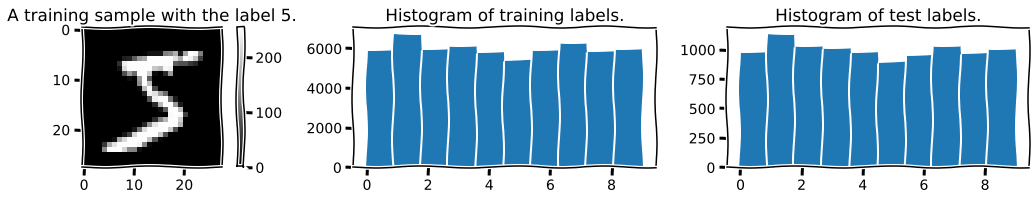

In [3]:
print(f"Training data shape: {tuple(train_data.data.shape)}")
print(f"Test data shape: {tuple(test_data.data.shape)}")

plt.subplot(1, 3, 1)
plt.title(f"A training sample with the label {train_data.targets[0]}.")
plt.imshow(train_data.data[0], cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Histogram of training labels.")
plt.hist(np.array(train_data.targets), bins=10)

plt.subplot(1, 3, 3)
plt.title("Histogram of test labels.")
plt.hist(np.array(test_data.targets), bins=10)

plt.gcf().set_size_inches(15, 3)
plt.tight_layout()
plt.show()

### Setup data loaders

In [4]:
from torch.utils.data import DataLoader

batch_size = 128

data_loader_train = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
)

data_loader_test = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
)

### Setup simple CNN and training

In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv0 = nn.Conv2d(
            in_channels=1,
            out_channels=32,
            kernel_size=3,
            padding=1,
        )

        self.conv1 = nn.Conv2d(
            in_channels=32,
            out_channels=32,
            kernel_size=3,
            padding=1,
        )

        self.conv2 = nn.Conv2d(
            in_channels=32,
            out_channels=32,
            kernel_size=3,
            padding=1,
        )

        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.flatten = nn.Flatten()
        self.dense = nn.Linear(512, 10)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)


    def forward(self, x):
        z = self.relu(self.pool(self.conv0(x)))
        z = self.relu(self.pool(self.conv1(z)))
        z = self.relu(self.pool(self.conv2(z)))

        z = self.flatten(z)
        z = self.dense(z)
        y = self.softmax(z)

        assert y.shape == (len(x), 10), f"{y.shape=}"
        assert torch.allclose(y.sum(dim=-1), torch.ones(1)), "Softmax did not normalize correctly."
        return y

In [6]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### Run training and plot results

In [7]:
n_epochs = 5

train_losses = []
test_losses = []

In [8]:
%%time

for epoch in range(n_epochs):

    train_losses_epoch = []
    test_losses_epoch = []

    model.train()

    for images, labels in data_loader_train:
        assert images.shape == (len(images), 1, 28, 28), f"{images.shape=}"
        assert labels.shape == (len(images),), f"{images.shape=}, {labels.shape=}"
        assert torch.all(0 <= images) and torch.all(images <= 1)

        preditions = model(images)
        loss = criterion(preditions, labels)
        train_losses_epoch.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_losses.append(np.mean(train_losses_epoch))


    model.eval()

    for images, labels in data_loader_test:
        preditions = model(images)
        loss = criterion(preditions, labels)
        test_losses_epoch.append(loss.item())

    test_losses.append(np.mean(test_losses_epoch))

    print(f"Epoch {epoch}'s train and test loss: {train_losses[-1]:.3f}, {test_losses[-1]:.3f}.")

Epoch 0's train and test loss: 1.761, 1.675.


Epoch 1's train and test loss: 1.673, 1.668.


Epoch 2's train and test loss: 1.605, 1.572.


Epoch 3's train and test loss: 1.572, 1.567.


Epoch 4's train and test loss: 1.569, 1.567.
CPU times: user 8min 17s, sys: 31.5 s, total: 8min 49s
Wall time: 1min 6s


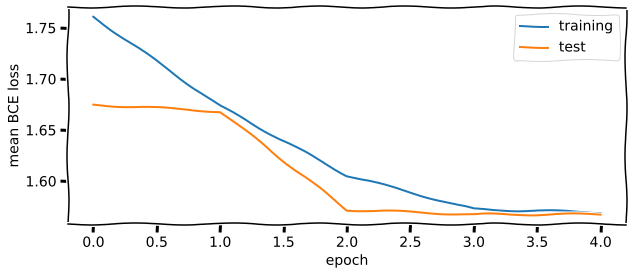

In [9]:
plt.plot(train_losses, label="training")
plt.plot(test_losses, label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("mean BCE loss")
plt.gcf().set_size_inches(10, 4)
plt.show()

## Exercises
* Try to find an MLP with maximal accuracy on MNIST. Try to find a CNN with maximal accuracy on MNIST.
* Think about why in the training above the training loss is higher then the test loss? Hint: the code is "problematic" if you only train for a few epochs -- like we did.
* Think about why aliasing could be a problem for pooling in the context of equivariance (even ignoring boundary effects)? Hint: Read about the Nyquist–Shannon sampling theorem.